In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
pd.__version__

'0.25.3'

In [3]:
from sklearn.linear_model import LinearRegression

## Data

In [71]:
df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

In [72]:
df_deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

In [73]:
df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20',
       '3/27/20', '3/28/20', '3/29/20', '3/30/20'],
      dtype='object')

In [74]:
df_deaths.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20',
       '3/27/20', '3/28/20', '3/29/20', '3/30/20'],
      dtype='object')

In [70]:
df_deaths[df_deaths["Country/Region"] == "United Kingdom"]

# df_deaths[df_deaths["Country/Region"] == "US"]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20
217,Bermuda,United Kingdom,32.3078,-64.7505,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
218,Cayman Islands,United Kingdom,19.3133,-81.2546,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
219,Channel Islands,United Kingdom,49.3723,-2.3644,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,2,2
220,Gibraltar,United Kingdom,36.1408,-5.3536,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
221,Isle of Man,United Kingdom,54.2361,-4.5481,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
222,Montserrat,United Kingdom,16.7425,-62.1874,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
223,NaN,United Kingdom,55.3781,-3.4360,0,0,0,0,0,0,...,233,281,335,422,465,578,759,1019,1228,1408
249,Anguilla,United Kingdom,18.2206,-63.0686,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
250,British Virgin Islands,United Kingdom,18.4207,-64.6400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
251,Turks and Caicos Islands,United Kingdom,21.6940,-71.7979,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
source = '../dataset_covid/covid19countryinfo.csv'
cols = ['region','country','pop','tests','testpop','density','medianage','urbanpop','quarantine','schools','hospibed','smokers','sex0','sex14','sex25','sex54','sex64','sex65plus','sexratio','lung','femalelung','malelung']
descritive_df = pd.read_csv(source, usecols=cols, quotechar='"', engine='python', sep=',', error_bad_lines=False)
descritive_df["pop"] = descritive_df["pop"].str.replace(",","").astype(float)


In [58]:
descritive_df = descritive_df.dropna(how='all')

In [59]:
#descritive_df[descritive_df['country']=='US']

In [60]:
quarantine_countries = list(descritive_df[(descritive_df["region"].isna()) & (descritive_df["quarantine"].isna() == False)]["country"])

In [62]:
descritive_df[(descritive_df["region"].isna()) & (descritive_df["quarantine"].isna() == False)][["country", "quarantine"]]

,country,quarantine
5,Argentina,3/20/2020
9,Austria,3/16/2020
16,Belgium,3/18/2020
35,Colombia,3/25/2020
43,Czechia,3/17/2020
44,Denmark,3/16/2020
51,El Salvador,3/12/2020
60,France,3/17/2020
69,Germany,3/21/2020
86,India,3/25/2020


In [14]:
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,24,40,40,74,84,94,110,110,120,170
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,76,89,104,123,146,174,186,197,212,223
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,139,201,230,264,302,367,409,454,511,584
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,88,113,133,164,188,224,267,308,334,370
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,3,3,3,4,4,5,7,7


## Data using population ratio

In [15]:
df_pop_ratio = df[df["Province/State"].isna()]
all_t = [col for col in df.columns if col not in ['Lat', 'Long', 'Country/Region', 'Province/State']]

all_countries_from_df = list(df_pop_ratio["Country/Region"])
all_countries_with_descriptive = list(descritive_df[descritive_df["region"].isna()]["country"])
all_full_countries = list(set(all_countries_from_df).intersection(all_countries_with_descriptive))

# print(all_full_countries)
for country in all_full_countries:
    for t in all_t:
#         print(country, ' - ', descritive_df[descritive_df["country"] == country]["pop"])
        raw_val = int(list(df_pop_ratio[df_pop_ratio["Country/Region"] == country][t])[0])
        raw_pop = int(list(descritive_df[(descritive_df["country"] == country) & (descritive_df["region"].isna())]["pop"])[0])
        df_pop_ratio.loc[df_pop_ratio["Country/Region"] == country, t] = raw_val / raw_pop
#         print(df_pop_ratio[df_pop_ratio["Country/Region"] == country][t])
#         print(country, ' - ', descritive_df[descritive_df["country"] == country]["pop"])

/anaconda3/envs/playground37/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [16]:
df_deaths_pop_ratio = df_deaths[df_deaths["Province/State"].isna()]
all_t = [col for col in df_deaths.columns if col not in ['Lat', 'Long', 'Country/Region', 'Province/State']]

all_countries_from_df = list(df_deaths_pop_ratio["Country/Region"])
# all_countries_with_descriptive = list(descritive_df["country"])
all_countries_with_descriptive = list(descritive_df[descritive_df["region"].isna()]["country"])

all_full_countries = list(set(all_countries_from_df).intersection(all_countries_with_descriptive))

# print(all_full_countries)
for country in all_full_countries:
    for t in all_t:
#         print(country, ' - ', descritive_df[descritive_df["country"] == country]["pop"])
        raw_val = int(list(df_deaths_pop_ratio[df_deaths_pop_ratio["Country/Region"] == country][t])[0])
        raw_pop = int(list(descritive_df[(descritive_df["country"] == country) & (descritive_df["region"].isna())]["pop"])[0])
        df_deaths_pop_ratio.loc[df_deaths_pop_ratio["Country/Region"] == country, t] = raw_val / raw_pop
#         print(df_pop_ratio[df_pop_ratio["Country/Region"] == country][t])
#         print(country, ' - ', descritive_df[descritive_df["country"] == country]["pop"])

## Data fitering and pivoting

### Pick countries of interest

In [17]:
# selected_countries= ['France', 'Germany', 'United Kingdom', 'Italy', 'Spain', 'US', 'Turkey']
selected_countries= ['France', 'Germany', 'United Kingdom', 'Italy', 'Spain', 'Netherlands', 'Turkey']
# selected_countries = []

# if len(selected_countries) == 0:
#     selected_countries = all_full_countries
    
# Korea, South'

In [18]:
#list(df['Country/Region'])

In [19]:
# df_deaths[df_deaths['Country/Region'] == 'Korea, South']

### Filter

In [20]:
countries = df['Country/Region'].unique()
df_filtered = df[df['Country/Region'].isin(selected_countries) & df['Province/State'].isna()]
df_filtered

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20
116,NaN,France,46.2276,2.2137,0,0,2,3,3,3,...,14282,16018,19856,22304,25233,29155,32964,37575,40174,44550
120,NaN,Germany,51.0000,9.0000,0,0,0,0,0,1,...,22213,24873,29056,32986,37323,43938,50871,57695,62095,66885
137,NaN,Italy,43.0000,12.0000,0,0,0,0,0,0,...,53578,59138,63927,69176,74386,80589,86498,92472,97689,101739
169,NaN,Netherlands,52.1326,5.2913,0,0,0,0,0,0,...,3631,4204,4749,5560,6412,7431,8603,9762,10866,11750
201,NaN,Spain,40.0000,-4.0000,0,0,0,0,0,0,...,25374,28768,35136,39885,49515,57786,65719,73235,80110,87956
213,NaN,Turkey,38.9637,35.2433,0,0,0,0,0,0,...,670,1236,1529,1872,2433,3629,5698,7402,9217,10827
223,NaN,United Kingdom,55.3781,-3.4360,0,0,0,0,0,0,...,5018,5683,6650,8077,9529,11658,14543,17089,19522,22141


In [21]:
countries = df_deaths['Country/Region'].unique()
df_filtered_deaths = df_deaths[df_deaths['Country/Region'].isin(selected_countries) & df_deaths['Province/State'].isna()]
df_filtered_deaths

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20
116,NaN,France,46.2276,2.2137,0,0,0,0,0,0,...,562,674,860,1100,1331,1696,1995,2314,2606,3024
120,NaN,Germany,51.0000,9.0000,0,0,0,0,0,0,...,84,94,123,157,206,267,342,433,533,645
137,NaN,Italy,43.0000,12.0000,0,0,0,0,0,0,...,4825,5476,6077,6820,7503,8215,9134,10023,10779,11591
169,NaN,Netherlands,52.1326,5.2913,0,0,0,0,0,0,...,136,179,213,276,356,434,546,639,771,864
201,NaN,Spain,40.0000,-4.0000,0,0,0,0,0,0,...,1375,1772,2311,2808,3647,4365,5138,5982,6803,7716
213,NaN,Turkey,38.9637,35.2433,0,0,0,0,0,0,...,9,30,37,44,59,75,92,108,131,168
223,NaN,United Kingdom,55.3781,-3.4360,0,0,0,0,0,0,...,233,281,335,422,465,578,759,1019,1228,1408


In [22]:
countries = df_pop_ratio['Country/Region'].unique()
df_pop_ratio_filtered = df_pop_ratio[df_pop_ratio['Country/Region'].isin(selected_countries) & df_pop_ratio['Province/State'].isna()]
df_pop_ratio_filtered

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20
116,NaN,France,46.2276,2.2137,0.0,0.0,3.064030e-08,4.596045e-08,4.596045e-08,4.596045e-08,...,0.000219,0.000245,0.000304,0.000342,0.000387,0.000447,0.000505,0.000576,0.000615,0.000683
120,NaN,Germany,51.0000,9.0000,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.193546e-08,...,0.000265,0.000297,0.000347,0.000394,0.000445,0.000524,0.000607,0.000689,0.000741,0.000798
137,NaN,Italy,43.0000,12.0000,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000886,0.000978,0.001057,0.001144,0.001230,0.001333,0.001431,0.001529,0.001616,0.001683
169,NaN,Netherlands,52.1326,5.2913,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000212,0.000245,0.000277,0.000324,0.000374,0.000434,0.000502,0.000570,0.000634,0.000686
201,NaN,Spain,40.0000,-4.0000,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000543,0.000615,0.000751,0.000853,0.001059,0.001236,0.001406,0.001566,0.001713,0.001881
213,NaN,Turkey,38.9637,35.2433,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000008,0.000015,0.000018,0.000022,0.000029,0.000043,0.000068,0.000088,0.000109,0.000128
223,NaN,United Kingdom,55.3781,-3.4360,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000074,0.000084,0.000098,0.000119,0.000140,0.000172,0.000214,0.000252,0.000288,0.000326


In [23]:
countries = df_deaths_pop_ratio['Country/Region'].unique()
df_deaths_pop_ratio_filtered = df_deaths_pop_ratio[df_deaths_pop_ratio['Country/Region'].isin(selected_countries) & df_deaths_pop_ratio['Province/State'].isna()]
df_deaths_pop_ratio_filtered

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20
116,NaN,France,46.2276,2.2137,0.0,0.0,0.0,0.0,0.0,0.0,...,8.609924e-06,1.032578e-05,1.317533e-05,1.685217e-05,2.039112e-05,2.598297e-05,0.000031,0.000035,0.000040,0.000046
120,NaN,Germany,51.0000,9.0000,0.0,0.0,0.0,0.0,0.0,0.0,...,1.002579e-06,1.121933e-06,1.468062e-06,1.873867e-06,2.458705e-06,3.186768e-06,0.000004,0.000005,0.000006,0.000008
137,NaN,Italy,43.0000,12.0000,0.0,0.0,0.0,0.0,0.0,0.0,...,7.980242e-05,9.056954e-05,1.005097e-04,1.127984e-04,1.240948e-04,1.358709e-04,0.000151,0.000166,0.000178,0.000192
169,NaN,Netherlands,52.1326,5.2913,0.0,0.0,0.0,0.0,0.0,0.0,...,7.937030e-06,1.044653e-05,1.243079e-05,1.610750e-05,2.077634e-05,2.532846e-05,0.000032,0.000037,0.000045,0.000050
201,NaN,Spain,40.0000,-4.0000,0.0,0.0,0.0,0.0,0.0,0.0,...,2.940876e-05,3.789987e-05,4.942810e-05,6.005803e-05,7.800272e-05,9.335944e-05,0.000110,0.000128,0.000146,0.000165
213,NaN,Turkey,38.9637,35.2433,0.0,0.0,0.0,0.0,0.0,0.0,...,1.067121e-07,3.557070e-07,4.387054e-07,5.217037e-07,6.995572e-07,8.892676e-07,0.000001,0.000001,0.000002,0.000002
223,NaN,United Kingdom,55.3781,-3.4360,0.0,0.0,0.0,0.0,0.0,0.0,...,3.432224e-06,4.139292e-06,4.934743e-06,6.216303e-06,6.849718e-06,8.514273e-06,0.000011,0.000015,0.000018,0.000021


In [24]:
countries = df_deaths_pop_ratio['Country/Region'].unique()
large_enough_countries = [c for c in descritive_df[(descritive_df["pop"] > 1e6) & (descritive_df["region"].isna())]["country"]]
df_deaths_pop_ratio_full_filtered = df_deaths_pop_ratio[df_deaths_pop_ratio['Country/Region'].isin(large_enough_countries) & df_deaths_pop_ratio['Province/State'].isna()]
df_deaths_pop_ratio_full_filtered

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20
0,NaN,Afghanistan,33.000000,65.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,2.568822e-08,2.568822e-08,2.568822e-08,5.137644e-08,1.027529e-07,1.027529e-07,1.027529e-07,1.027529e-07,1.027529e-07
1,NaN,Albania,41.153300,20.168300,0.0,0.0,0.0,0.0,0.0,0.0,...,6.949761e-07,6.949761e-07,1.389952e-06,1.737440e-06,1.737440e-06,2.084928e-06,2.779904e-06,3.474880e-06,3.474880e-06,3.822368e-06
2,NaN,Algeria,28.033900,1.659600,0.0,0.0,0.0,0.0,0.0,0.0,...,3.420671e-07,3.876761e-07,3.876761e-07,4.332850e-07,4.788940e-07,5.701119e-07,5.929163e-07,6.613298e-07,7.069387e-07,7.981566e-07
6,NaN,Argentina,-38.416100,-63.616700,0.0,0.0,0.0,0.0,0.0,0.0,...,8.850385e-08,8.850385e-08,8.850385e-08,1.327558e-07,1.770077e-07,1.991337e-07,2.876375e-07,3.982673e-07,4.203933e-07,5.088971e-07
7,NaN,Armenia,40.069100,45.038200,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.374681e-07,3.374681e-07,3.374681e-07,1.012404e-06,1.012404e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,NaN,Laos,19.856270,102.495496,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
240,NaN,Libya,26.335100,17.228331,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
242,NaN,Guinea-Bissau,11.803700,-15.180400,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
243,NaN,Mali,17.570692,-3.996166,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.938068e-08,9.876137e-08


### Pivot

In [25]:
index = [col for col in df.columns if col not in ['Lat', 'Long', 'Country/Region', 'Province/State']]
df_pivot = df_filtered[index].T
df_pivot.columns = list(df_filtered['Country/Region'])
countries_lst = df_pivot.columns

In [26]:
index = [col for col in df_deaths.columns if col not in ['Lat', 'Long', 'Country/Region', 'Province/State']]
df_pivot_deaths = df_filtered_deaths[index].T
df_pivot_deaths.columns = list(df_filtered_deaths['Country/Region'])
countries_lst = df_pivot_deaths.columns

In [27]:
index = [col for col in df_pop_ratio.columns if col not in ['Lat', 'Long', 'Country/Region', 'Province/State']]
df_pop_ratio_pivot = df_pop_ratio_filtered[index].T
df_pop_ratio_pivot.columns = list(df_pop_ratio_filtered['Country/Region'])
countries_lst = df_pop_ratio_pivot.columns

In [28]:
index = [col for col in df_deaths_pop_ratio.columns if col not in ['Lat', 'Long', 'Country/Region', 'Province/State']]
df_deaths_pop_ratio_pivot = df_deaths_pop_ratio_filtered[index].T
df_deaths_pop_ratio_pivot.columns = list(df_deaths_pop_ratio_filtered['Country/Region'])
countries_lst = df_deaths_pop_ratio_pivot.columns

In [29]:
index = [col for col in df_deaths_pop_ratio_full_filtered.columns if col not in ['Lat', 'Long', 'Country/Region', 'Province/State']]
df_deaths_pop_ratio_full_pivot = df_deaths_pop_ratio_full_filtered[index].T
df_deaths_pop_ratio_full_pivot.columns = list(df_deaths_pop_ratio_full_filtered['Country/Region'])

In [30]:
df_deaths_pop_ratio_pivot.tail()

,France,Germany,Italy,Netherlands,Spain,Turkey,United Kingdom
3/26/20,0.000026,0.000003,0.000136,0.000025,0.000093,8.892676e-07,0.000009
3/27/20,0.000031,0.000004,0.000151,0.000032,0.000110,1.090835e-06,0.000011
3/28/20,0.000035,0.000005,0.000166,0.000037,0.000128,1.280545e-06,0.000015
3/29/20,0.000040,0.000006,0.000178,0.000045,0.000146,1.553254e-06,0.000018
3/30/20,0.000046,0.000008,0.000192,0.000050,0.000165,1.991959e-06,0.000021


In [31]:
df_deaths_pop_ratio_full_pivot.tail()

,Afghanistan,Albania,Algeria,Argentina,Armenia,Austria,Azerbaijan,Bahrain,Bangladesh,Belarus,...,Zambia,Zimbabwe,Mozambique,Syria,Timor-Leste,Laos,Libya,Guinea-Bissau,Mali,Kosovo
3/26/20,1.027529e-07,0.000002,5.701119e-07,1.991337e-07,3.374681e-07,0.000005,2.958820e-07,0.000002,3.036018e-08,0.0,...,0.0,6.728151e-08,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00,5.523449e-07
3/27/20,1.027529e-07,0.000003,5.929163e-07,2.876375e-07,3.374681e-07,0.000006,2.958820e-07,0.000002,3.036018e-08,0.0,...,0.0,6.728151e-08,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00,5.523449e-07
3/28/20,1.027529e-07,0.000003,6.613298e-07,3.982673e-07,3.374681e-07,0.000008,3.945093e-07,0.000002,3.036018e-08,0.0,...,0.0,6.728151e-08,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00,5.523449e-07
3/29/20,1.027529e-07,0.000003,7.069387e-07,4.203933e-07,1.012404e-06,0.000010,3.945093e-07,0.000002,3.036018e-08,0.0,...,0.0,6.728151e-08,0.0,5.750303e-08,0.0,0.0,0.0,0.0,4.938068e-08,5.523449e-07
3/30/20,1.027529e-07,0.000004,7.981566e-07,5.088971e-07,1.012404e-06,0.000012,3.945093e-07,0.000002,3.036018e-08,0.0,...,0.0,6.728151e-08,0.0,1.150061e-07,0.0,0.0,0.0,0.0,9.876137e-08,5.523449e-07


In [32]:
list(df_deaths_pop_ratio_pivot.Italy)

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.653936154690399e-08,
 3.307872309380798e-08,
 4.9618084640711975e-08,
 1.1577553082832794e-07,
 1.6539361546903993e-07,
 1.984723385628479e-07,
 2.8116914629736785e-07,
 3.4732659248498385e-07,
 4.796414848602158e-07,
 5.623382925947357e-07,
 8.600468004390076e-07,
 1.3066095622054153e-06,
 1.7697116855187271e-06,
 2.447825508941791e-06,
 3.2582542247400863e-06,
 3.85367124042863e-06,
 6.053406326166861e-06,
 7.657724396216548e-06,
 1.0436337136096419e-05,
 1.3678051999289601e-05,
 1.3678051999289601e-05,
 2.0938831718380455e-05,
 2.3833219989088653e-05,
 2.9919705038349323e-05,
 3.569194221821881e-05,
 4.139802195190069e-05,
 4.9254218686680086e-05,
 5.631652606720809e-05,
 6.66867057571169e-05,
 7.980241946381177e-05,
 9.056954383084626e-05,
 0.00010050970012053556,
 0.00011279844574988523,
 0.0001240948

## Plots

### Original data

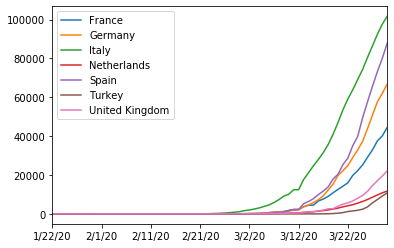

In [33]:
df_pivot.plot()

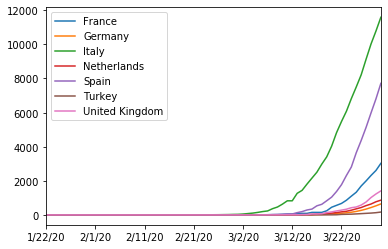

In [34]:
df_pivot_deaths.plot()

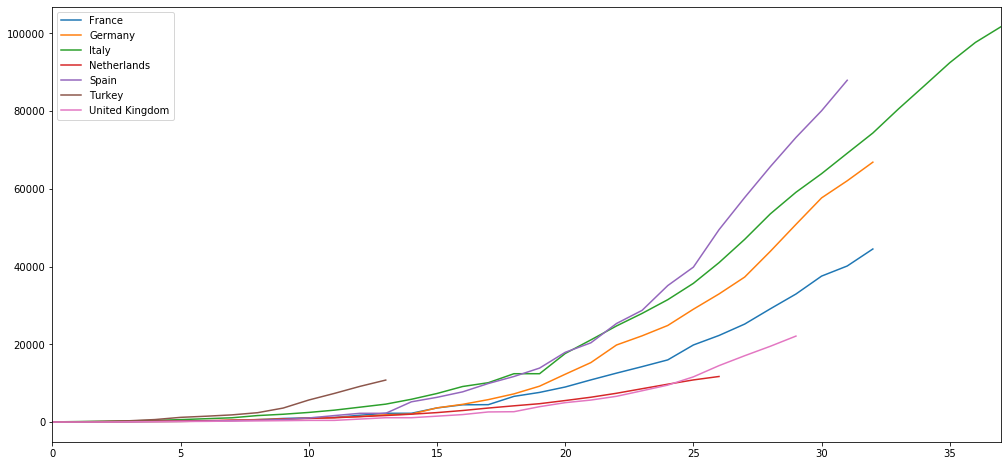

In [35]:
fig, ax = plt.subplots(1, figsize=(17,8))
for col in countries_lst:
    ts = df_pivot[df_pivot[col]>=30][col].reset_index(drop=True)
#     ts = df_pivot[col].reset_index(drop=True)
    ts.plot(ax=ax)
plt.legend()

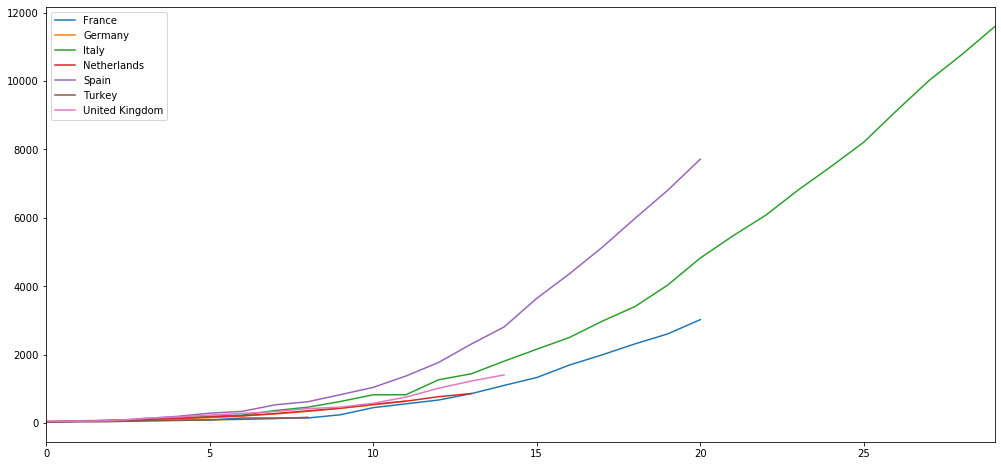

In [36]:
fig, ax = plt.subplots(1, figsize=(17,8))
for col in countries_lst:
    ts = df_pivot_deaths[df_pivot_deaths[col]>=30][col].reset_index(drop=True)
#     ts = df_pivot[col].reset_index(drop=True)
    ts.plot(ax=ax)
plt.legend()

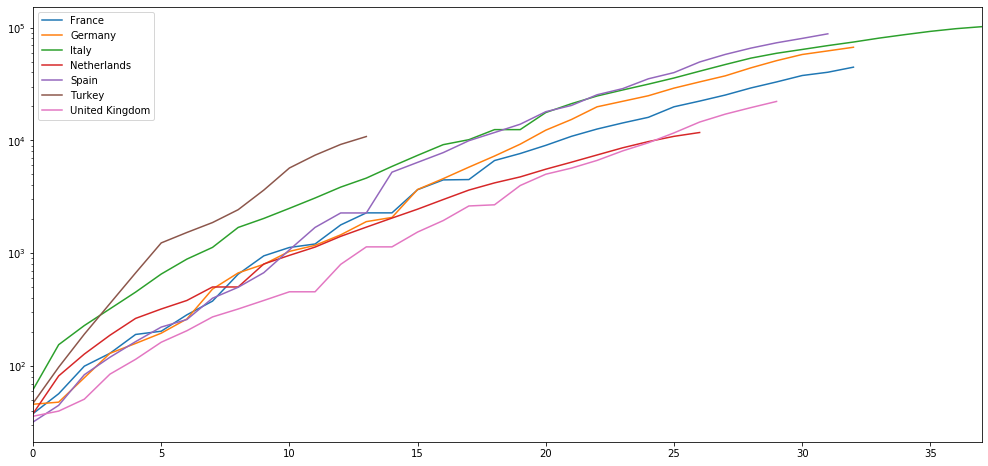

In [37]:
fig, ax = plt.subplots(1, figsize=(17,8))
for col in countries_lst:
    ts = df_pivot[df_pivot[col]>=30][col].reset_index(drop=True)
    #ts['school closure'] = descritive_df['schools']
    #ts = ts
    ts.plot(ax=ax)
plt.yscale('log')
plt.legend()

### Population ratio data

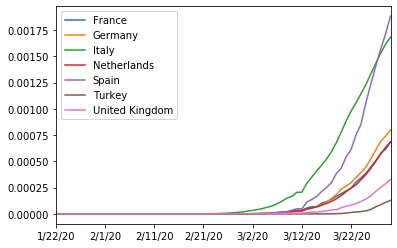

In [38]:
df_pop_ratio_pivot.plot()

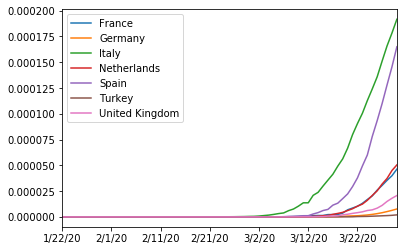

In [39]:
df_deaths_pop_ratio_pivot.plot()

## Aligning data from different countries

#### on day a given number of deaths has been reached

In [40]:
death_thresh = 50

In [41]:
# selected country data
new_ts_data = {}
for col in df_pivot_deaths.columns:
    tmp = df_pivot_deaths[col]
    selected_vals = list(tmp[tmp > death_thresh])
    new_ts_data[col] = selected_vals
df_deaths_pivot_aligned = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in new_ts_data.items() ]))



#### on day a given death population ration has been reached

In [42]:
# ratio_thresh = 1.1577553082832794e-07
ratio_thresh = 1.0e-07 # ref: an early Italian death_pop_ratio from Italy

In [43]:
# selected country data
new_ts_data = {}
for col in df_deaths_pop_ratio_pivot.columns:
    tmp = df_deaths_pop_ratio_pivot[col]
    selected_vals = list(tmp[tmp > ratio_thresh])
    new_ts_data[col] = selected_vals
df_deaths_pop_ratio_pivot_aligned = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in new_ts_data.items() ]))

# full country list data
new_ts_data = {}
for col in df_deaths_pop_ratio_full_pivot.columns:
    tmp = df_deaths_pop_ratio_full_pivot[col]
    selected_vals = list(tmp[tmp > ratio_thresh])
    new_ts_data[col] = selected_vals
df_deaths_pop_ratio_full_pivot_aligned = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in new_ts_data.items() ]))

In [44]:
df_deaths_pop_ratio_pivot_aligned.head()

,France,Germany,Italy,Netherlands,Spain,Turkey,United Kingdom
0,1.378814e-07,1.074192e-07,1.157755e-07,1.750816e-07,1.069409e-07,1.067121e-07,1.178446e-07
1,1.685217e-07,1.312901e-07,1.653936e-07,1.750816e-07,2.138819e-07,3.557070e-07,1.178446e-07
2,2.910829e-07,2.029028e-07,1.984723e-07,2.334421e-07,3.635992e-07,4.387054e-07,1.178446e-07
3,2.910829e-07,2.864511e-07,2.811691e-07,2.918026e-07,5.988693e-07,5.217037e-07,3.093421e-07
4,5.055650e-07,3.341929e-07,3.473266e-07,2.918026e-07,7.485866e-07,6.995572e-07,3.093421e-07


In [45]:
df_deaths_pop_ratio_full_pivot_aligned.head()

,Afghanistan,Albania,Algeria,Argentina,Armenia,Austria,Azerbaijan,Bahrain,Bangladesh,Belarus,...,Zambia,Zimbabwe,Mozambique,Syria,Timor-Leste,Laos,Libya,Guinea-Bissau,Mali,Kosovo
0,1.027529e-07,3.474880e-07,1.596313e-07,1.327558e-07,3.374681e-07,1.110322e-07,1.972547e-07,5.876908e-07,NaN,NaN,...,NaN,NaN,NaN,1.150061e-07,NaN,NaN,NaN,NaN,NaN,5.523449e-07
1,1.027529e-07,3.474880e-07,2.052403e-07,1.770077e-07,3.374681e-07,1.110322e-07,2.958820e-07,5.876908e-07,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.523449e-07
2,1.027529e-07,3.474880e-07,2.508492e-07,1.991337e-07,3.374681e-07,1.110322e-07,2.958820e-07,5.876908e-07,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.523449e-07
3,1.027529e-07,3.474880e-07,3.420671e-07,2.876375e-07,1.012404e-06,1.110322e-07,3.945093e-07,5.876908e-07,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.523449e-07
4,1.027529e-07,3.474880e-07,3.876761e-07,3.982673e-07,1.012404e-06,3.330965e-07,3.945093e-07,5.876908e-07,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.523449e-07


## Plotting aligned data

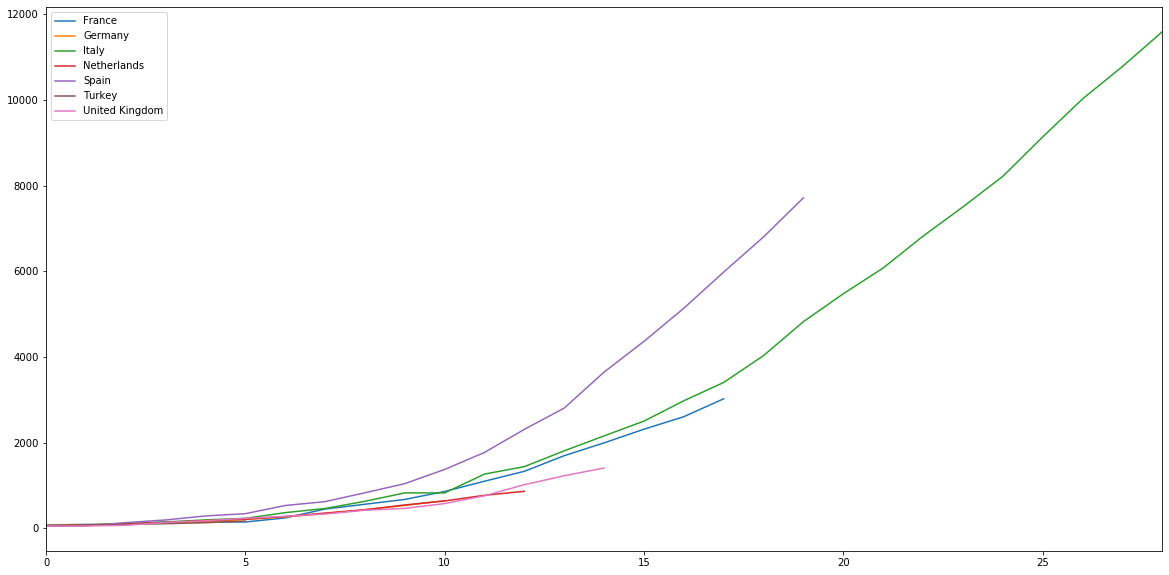

In [46]:
df_deaths_pivot_aligned.plot(figsize=(20,10))

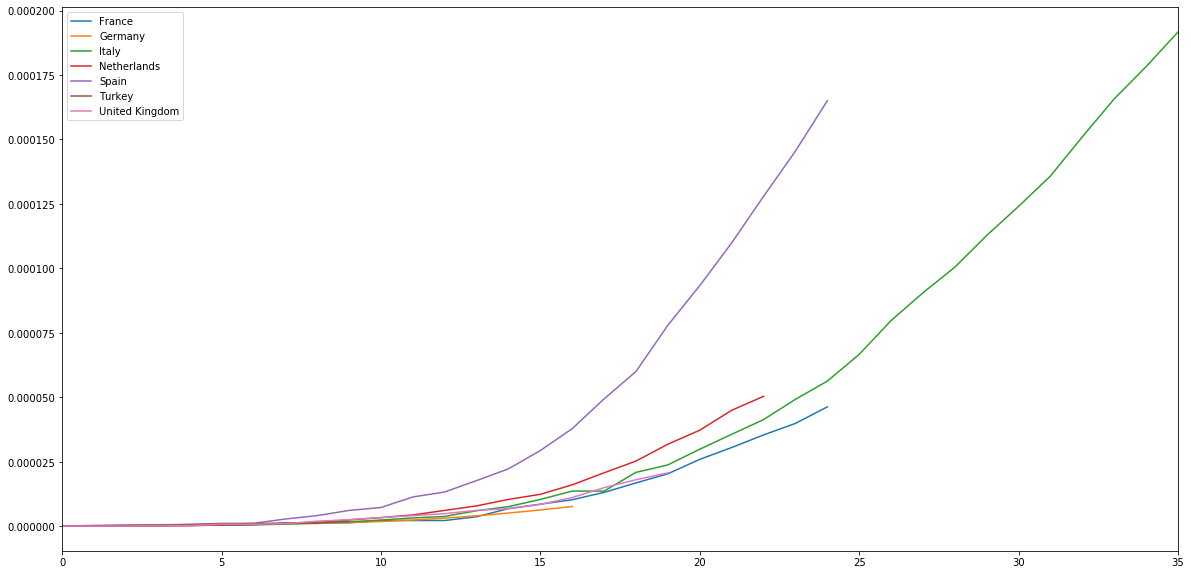

In [47]:
df_deaths_pop_ratio_pivot_aligned.plot(figsize=(20,10))

#### Listing death_pop_ratio in DECREASING order

In [63]:
max_ratio_dict = {}
daily_ratio_dict = {}
n_points = {}
nan_ratio_removed = []
superhigh_ratio_removed = []
for col in df_deaths_pop_ratio_full_pivot_aligned.columns:
#     max_ratio_dict[col] = {}
#     l = [x for x in list(df_deaths_pop_ratio_full_pivot_aligned[col]) if ~np.isnan(x)]
#     print(l)
    if np.isnan(max(df_deaths_pop_ratio_full_pivot_aligned[col])):
        nan_ratio_removed.append(col)
    elif max(df_deaths_pop_ratio_full_pivot_aligned[col]) >= 1:
        superhigh_ratio_removed.append(col)
    else:
        max_ratio_dict[col] = max(df_deaths_pop_ratio_full_pivot_aligned[col])
        n_points[col] = len([x for x in list(df_deaths_pop_ratio_full_pivot_aligned[col]) if ~np.isnan(x)])
        daily_ratio_dict[col] = max_ratio_dict[col] / n_points[col]
max_ratio_sorted_dict = {k: v for k, v in sorted(max_ratio_dict.items(), key=lambda item: item[1], reverse = True)}
daily_ratio_sorted_dict = {k: v for k, v in sorted(daily_ratio_dict.items(), key=lambda item: item[1], reverse = True)}

print('Countries removed from list because of nan:\n', nan_ratio_removed)
print('Countries removed from list because of very large (erroneous) ratio:\n', superhigh_ratio_removed)

Countries removed from list because of nan:
 ['Bangladesh', 'Belarus', 'Benin', 'Cambodia', 'Central African Republic', 'Chad', 'Congo (Brazzaville)', 'Congo (Kinshasa)', "Cote d'Ivoire", 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Georgia', 'Guatemala', 'Guinea', 'Haiti', 'India', 'Kenya', 'Kuwait', 'Kyrgyzstan', 'Latvia', 'Liberia', 'Madagascar', 'Mongolia', 'Namibia', 'Nepal', 'Nigeria', 'Oman', 'Pakistan', 'Russia', 'Rwanda', 'Senegal', 'Somalia', 'South Africa', 'Sri Lanka', 'Sudan', 'Tanzania', 'Uganda', 'Uzbekistan', 'Vietnam', 'Zambia', 'Zimbabwe', 'Mozambique', 'Timor-Leste', 'Laos', 'Libya', 'Guinea-Bissau', 'Mali']
Countries removed from list because of very large (erroneous) ratio:
 []


In [64]:
for x in list(max_ratio_sorted_dict)[0:40]:
    print ("{}\t{}\t({} days \t per_day {})".format(x,  max_ratio_sorted_dict[x], n_points[x], (max_ratio_sorted_dict[x]/ n_points[x])))
    

Italy	0.00019170773969016418	(36 days 	 per_day 5.3252149913934495e-06)
Spain	0.00016503126161779657	(25 days 	 per_day 6.601250464711863e-06)
Netherlands	5.042348726036588e-05	(23 days 	 per_day 2.1923255330593863e-06)
France	4.6328134547565554e-05	(25 days 	 per_day 1.8531253819026222e-06)
Belgium	4.426373489456905e-05	(20 days 	 per_day 2.213186744728452e-06)
Switzerland	4.148072555912898e-05	(26 days 	 per_day 1.5954125215049608e-06)
Iran	3.2824183849051423e-05	(36 days 	 per_day 9.117828846958729e-07)
United Kingdom	2.0740650087688906e-05	(20 days 	 per_day 1.0370325043844453e-06)
Sweden	1.4456497576803856e-05	(17 days 	 per_day 8.503822104002269e-07)
Portugal	1.372992011442123e-05	(13 days 	 per_day 1.0561477011093253e-06)
Denmark	1.3293735266829438e-05	(17 days 	 per_day 7.819844274605551e-07)
Austria	1.199147539338146e-05	(19 days 	 per_day 6.311302838621822e-07)
Ireland	1.0936075398974358e-05	(20 days 	 per_day 5.468037699487179e-07)
US	8.996906795166423e-06	(20 days 	 per_day

In [65]:
for x in list(daily_ratio_sorted_dict)[0:40]:
    print ("{}\t{}\t({} days)".format(x,  daily_ratio_sorted_dict[x], n_points[x]))
    

Spain	6.601250464711863e-06	(25 days)
Italy	5.3252149913934495e-06	(36 days)
Belgium	2.213186744728452e-06	(20 days)
Netherlands	2.1923255330593863e-06	(23 days)
France	1.8531253819026222e-06	(25 days)
Switzerland	1.5954125215049608e-06	(26 days)
Portugal	1.0561477011093253e-06	(13 days)
United Kingdom	1.0370325043844453e-06	(20 days)
Iran	9.117828846958729e-07	(36 days)
Sweden	8.503822104002269e-07	(17 days)
Denmark	7.819844274605551e-07	(17 days)
Cyprus	6.441976063273457e-07	(9 days)
Austria	6.311302838621822e-07	(19 days)
Ireland	5.468037699487179e-07	(20 days)
Germany	4.528454446627521e-07	(17 days)
US	4.498453397583211e-07	(20 days)
Estonia	3.769218301816387e-07	(6 days)
Romania	3.754204297294422e-07	(9 days)
North Macedonia	3.7332604600891526e-07	(9 days)
Trinidad and Tobago	3.5727351717199435e-07	(6 days)
Norway	3.472180892117636e-07	(17 days)
Bolivia	3.4267050491899227e-07	(1 days)
Dominican Republic	3.2264279478719865e-07	(12 days)
Slovenia	3.112448873075636e-07	(17 days)
Czec

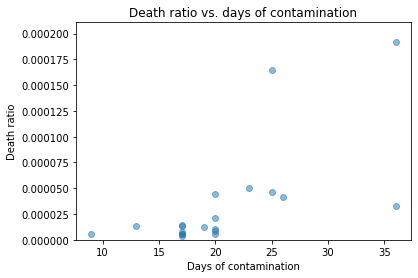

In [66]:
thex = [n_points[x] for x in list(max_ratio_sorted_dict)[0:20]]
they = [max_ratio_sorted_dict[x] for x in list(max_ratio_sorted_dict)[0:20]]
    
plt.scatter(thex, they, alpha=0.5)
plt.title('Death ratio vs. days of contamination')
plt.xlabel('Days of contamination')
plt.ylabel('Death ratio')
# plt.xlim(-1, 1)
plt.ylim(0, max(they)+0.1*max(they))
plt.show()


Text(0, 0.5, 'Daily population death ratio since start of contamination')

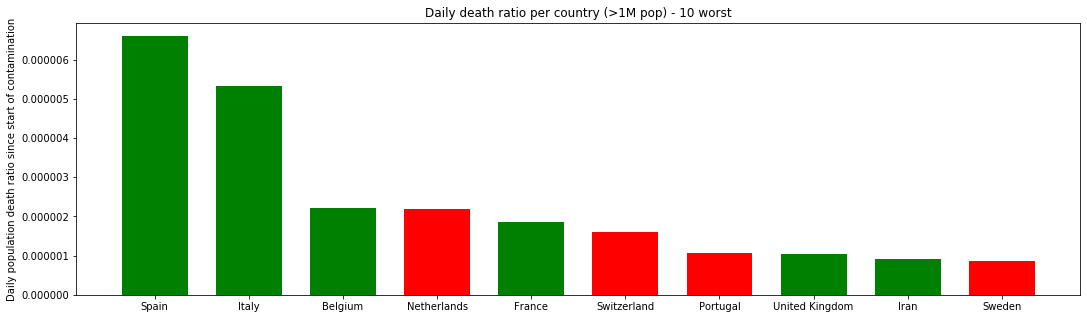

In [67]:
thex = [x for x in list(daily_ratio_sorted_dict)[0:10]]
they = [daily_ratio_sorted_dict[x] for x in list(daily_ratio_sorted_dict)[0:10]]
thecolour = ['g' if x in quarantine_countries else 'r' for x in list(daily_ratio_sorted_dict)[0:10]]

f, ax = plt.subplots(figsize=(18,5))
plt.bar(thex, they, color = thecolour, width=0.7)
plt.title('Daily death ratio per country (>1M pop) - 10 worst')
plt.ylabel('Daily population death ratio since start of contamination')

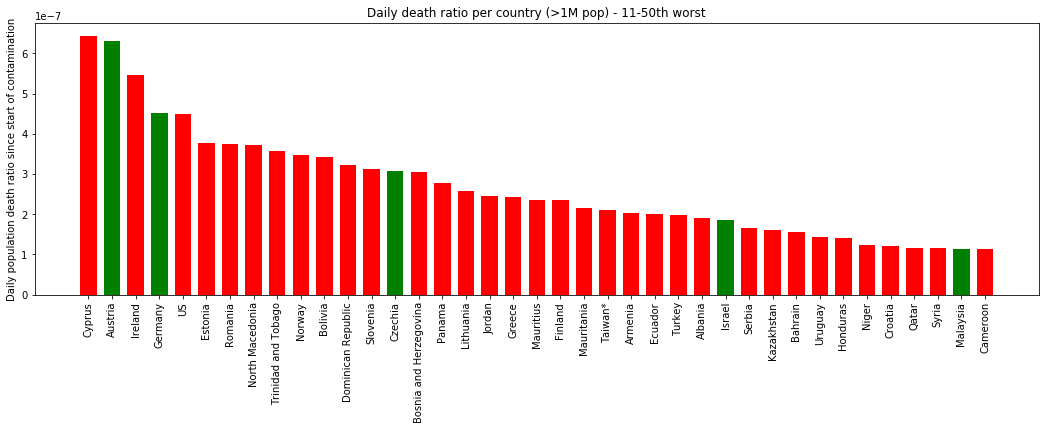

In [68]:
thex = [x for x in list(daily_ratio_sorted_dict)[11:50]]
they = [daily_ratio_sorted_dict[x] for x in list(daily_ratio_sorted_dict)[11:50]]
thecolour = ['g' if x in quarantine_countries else 'r' for x in list(daily_ratio_sorted_dict)[11:50]]

f, ax = plt.subplots(figsize=(18,5))
plt.bar(thex, they, color = thecolour, width=0.7)
plt.title('Daily death ratio per country (>1M pop) - 11-50th worst')
plt.ylabel('Daily population death ratio since start of contamination')
plt.xticks(rotation=90);

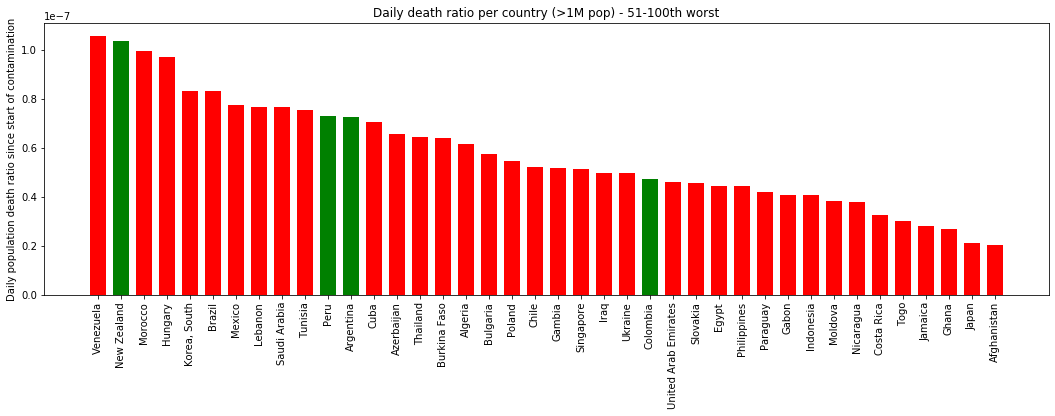

In [69]:
thex = [x for x in list(daily_ratio_sorted_dict)[51:100]]
they = [daily_ratio_sorted_dict[x] for x in list(daily_ratio_sorted_dict)[51:100]]
thecolour = ['g' if x in quarantine_countries else 'r' for x in list(daily_ratio_sorted_dict)[51:100]]

f, ax = plt.subplots(figsize=(18,5))
plt.bar(thex, they, color = thecolour, width=0.7)
plt.title('Daily death ratio per country (>1M pop) - 51-100th worst')
plt.ylabel('Daily population death ratio since start of contamination')
plt.xticks(rotation=90);

## Growth

In [55]:
df_pivot[['{}_growth'.format(col) for col in countries_lst]] = df_pivot.diff()/df_pivot

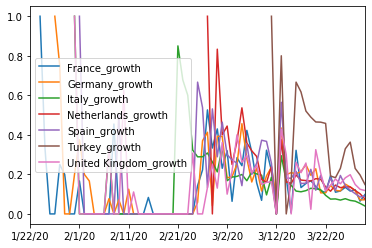

In [56]:
df_pivot.filter(regex='growth').plot()

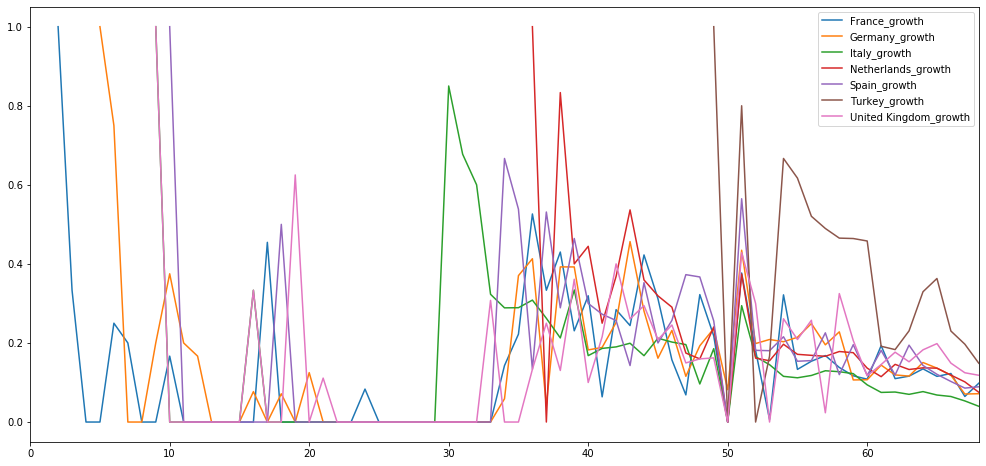

In [57]:
fig, ax = plt.subplots(1, figsize=(17,8))
growth = df_pivot.filter(regex='growth').columns
for col in growth:
    ts = df_pivot[col].reset_index(drop=True)
    ts.plot(ax=ax)
plt.legend()